In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.naive_bayes import ComplementNB,MultinomialNB
from sklearn.svm import SVC,LinearSVC
import matplotlib.pyplot as plt

In [2]:
# Data sources list 
folder = ['Amazon','FlipKart','Combine','Walmart']
class FeatureSelection:
    def __init__(self,num):
        self.num = num
    # initialise the train and test data
    def openFile(self):
        num = self.num
        print("----- OPEN "+folder[num]+" data ----- \n")
        trainData = pd.read_csv(folder[num]+'/X_train.csv')
        trainLabel = pd.read_csv(folder[num]+'/y_train.csv')
        testData = pd.read_csv(folder[num]+'/X_test.csv')
        testLabel = pd.read_csv(folder[num]+'/y_test.csv')
        if(num==0 or num==2):
            # For Description has nan row
            df = pd.concat([trainData,trainLabel], axis = 1)
            df = df.dropna(subset=['X_train'])
            trainData = pd.DataFrame({'X_train':df.X_train})
            trainLabel = pd.DataFrame({'category':df.category,'subcategory':df.subcategory})
            df = pd.concat([testData,testLabel], axis = 1)
            df = df.dropna(subset=['X_test'])
            testData = pd.DataFrame({'X_test':df.X_test})
            testLabel = pd.DataFrame({'category':df.category,'subcategory':df.subcategory})
        self.X_train = trainData['X_train']
        self.y_train = trainLabel['category']
        self.y_trainnd = trainLabel['subcategory']
        self.X_test = testData['X_test']
        self.y_test = testLabel['category']
        self.y_testnd = testLabel['subcategory']

    def tfidfConvert(self, num):
        tfidfconverter = TfidfVectorizer(min_df=5, max_df=0.7,ngram_range=(1,num))
        print("----- Convert train data and test data to vector ----- \n")
        X = tfidfconverter.fit_transform(self.X_train)
        XTest = tfidfconverter.transform(self.X_test)
        self.originTrainFeatures = X
        self.originTestFeatures = XTest
        print("----- Total # features: "+str(X.shape[1])+" ----- \n")
        self.total_feature = X.shape[1]
    def selectBestfeatureViaChi2(self,num):
        selectBest = SelectKBest(chi2, k=num).fit(self.originTrainFeatures, self.y_train)
        self.select_feature = selectBest.transform(self.originTrainFeatures)
        self.test_features = selectBest.transform(self.originTestFeatures)
    def ndLevelSelectBestfeatureViaChi2(self,num):
        selectBest = SelectKBest(chi2, k=num).fit(self.originTrainFeatures, self.y_trainnd)
        self.select_feature = selectBest.transform(self.originTrainFeatures)
        self.test_features = selectBest.transform(self.originTestFeatures)
    def MNBC(self):
        numofBest = [ele for ele in range(1000, self.total_feature, 1000)]
        scores = []
        for ele in numofBest:
            print("----- Select Best "+str(ele)+" features ----- \n")
            self.selectBestfeatureViaChi2(ele)
            MNB = MultinomialNB()
            print("----- MNB fitting -----")
            MNB.fit(self.select_feature,self.y_train)
            score = MNB.score(self.test_features,self.y_test)
            scores.append(score)
        index = np.argmax(scores)
        bestSize = numofBest[index]
        bestAccracy = scores[index]
        self.bestSize = bestSize
        self.bestAccracy = bestAccracy
        print("Best Feature Selection Size:" + str(bestSize) + "\n")
        print("Best Accuracy:" + str(bestAccracy) + "\n")
        return numofBest,scores
    def CNBC(self):
        numofBest = [ele for ele in range(1000, self.total_feature, 1000)]
        scores = []
        for ele in numofBest:
            print("----- Select Best "+str(ele)+" features ----- \n")
            self.selectBestfeatureViaChi2(ele)
            CNBC = ComplementNB()
            print("----- CNBC fitting -----")
            CNBC.fit(self.select_feature,self.y_train)
            score = CNBC.score(self.test_features,self.y_test)
            scores.append(score)
        index = np.argmax(scores)
        bestSize = numofBest[index]
        bestAccracy = scores[index]
        self.bestSize = bestSize
        self.bestAccracy = bestAccracy
        print("Best Feature Selection Size:" + str(bestSize) + "\n")
        print("Best Accuracy:" + str(bestAccracy) + "\n")
        return numofBest,scores
    

#         self.plotDifferentNumFeatureInfluence("MNBC",numofBest,scores,folder[self.num])
    def ndLevelMNBC(self):
        numofBest = [ele for ele in range(1000, self.total_feature, 1000)]
        scores = []
        for ele in numofBest:
            print("----- Select Best "+str(ele)+" features ----- \n")
            self.ndLevelSelectBestfeatureViaChi2(ele)
            MNB = MultinomialNB()
            print("----- MNB fitting -----")
            MNB.fit(self.select_feature,self.y_trainnd)
            score = MNB.score(self.test_features,self.y_testnd)
            scores.append(score)
        index = np.argmax(scores)
        bestSize = numofBest[index]
        bestAccracy = scores[index]
        self.bestSize = bestSize
        self.bestAccracy = bestAccracy
        print("Best Feature Selection Sizein second level:" + str(bestSize) + "\n")
        print("Best Accuracy in second level:" + str(bestAccracy) + "\n")
        return numofBest,scores
    def ndLevelCNBC(self):
        numofBest = [ele for ele in range(1000, self.total_feature, 1000)]
        scores = []
        for ele in numofBest:
            print("----- Select Best "+str(ele)+" features ----- \n")
            self.ndLevelSelectBestfeatureViaChi2(ele)
            CNBC = ComplementNB()
            print("----- CNBC fitting -----")
            CNBC.fit(self.select_feature,self.y_trainnd)
            score = CNBC.score(self.test_features,self.y_testnd)
            scores.append(score)
        index = np.argmax(scores)
        bestSize = numofBest[index]
        bestAccracy = scores[index]
        self.bestSize = bestSize
        self.bestAccracy = bestAccracy
        print("Best Feature Selection Sizein second level:" + str(bestSize) + "\n")
        print("Best Accuracy in second level:" + str(bestAccracy) + "\n")
        return numofBest,scores

#         self.plotDifferentNumFeatureInfluence("MNBC",numofBest,scores,folder[self.num])
    def SVC(self):
        numofBest = [ele for ele in range(1000, self.total_feature, 1000)]
        scores = []
        for ele in numofBest:
            print("----- Select Best "+str(ele)+" features ----- \n")
            self.selectBestfeatureViaChi2(ele)
            svc = LinearSVC(random_state=42,class_weight="balanced")
            print("----- SVC fitting -----")
            svc.fit(self.select_feature,self.y_train)
            score = svc.score(self.test_features,self.y_test)
            scores.append(score)
        index = np.argmax(scores)
        bestSize = numofBest[index]
        bestAccracy = scores[index]
        print("Best Feature Selection Size:" + str(bestSize) + "\n")
        print("Best Accuracy:" + str(bestAccracy) + "\n")
        self.bestSize = bestSize
        self.bestAccracy = bestAccracy
        return numofBest,scores
#         self.plotDifferentNumFeatureInfluence("SVC",numofBest,scores, folder[self.num])
    def ndLevelSVC(self):
        numofBest = [ele for ele in range(1000, self.total_feature, 1000)]
        scores = []
        for ele in numofBest:
            print("----- Select Best "+str(ele)+" features ----- \n")
            self.ndLevelSelectBestfeatureViaChi2(ele)
            svc = LinearSVC(random_state=42,class_weight="balanced")
            print("----- SVC fitting -----")
            svc.fit(self.select_feature,self.y_trainnd)
            score = svc.score(self.test_features,self.y_testnd)
            scores.append(score)
        index = np.argmax(scores)
        bestSize = numofBest[index]
        bestAccracy = scores[index]
        self.bestSize = bestSize
        self.bestAccracy = bestAccracy
        print("Best Feature Selection Sizein second level:" + str(bestSize) + "\n")
        print("Best Accuracy in second level:" + str(bestAccracy) + "\n")
        return numofBest,scores
#         self.plotDifferentNumFeatureInfluence("SVC",numofBest,scores, folder[self.num])
    def getBestSize(self):
        return self.bestSize
    def getBestAccuracy(self):
        return self.bestAccracy


In [3]:
def plotDifferentNumFeatureInfluence(X1,X2,SVCst,SVCnd,MNBCst,MNBCnd,CNBCst,CNBCnd,datasource,gram):
        fig, ax = plt.subplots(1, 2, figsize=(10, 2))
#         ax.plot(numlists, scores)
        ax[0].plot(X1, SVCst, color='tab:blue',label='SVC')
        ax[0].plot(X1, MNBCst, color='tab:red', label = "MNBC")
        ax[0].plot(X1, CNBCst, color='tab:orange', label = "CNBC")

        ax[1].plot(X2, SVCnd, color='tab:blue',label='SVC')
        ax[1].plot(X2, MNBCnd, color='tab:red',label='MNBC')
        ax[1].plot(X2, CNBCnd, color='tab:orange',label='CNBC')
        ax[0].set(xlabel='Number of best score features', ylabel='Accuracy')
        ax[1].set(xlabel='Number of best score features', ylabel='Accuracy')
        title1='Different number of best features to accuracy \n in the '+ datasource + " first-level categories"
        title2='Different number of best features to accuracy \n in the '+ datasource + " second-level categories"
        ax[0].set_title(title1)
        ax[1].set_title(title2)
        ax[0].legend()
        ax[1].legend()
        ax[0].grid()
        ax[1].grid() 
        fig.savefig("best"+str(gram)+"gram"+datasource+".png")


In [4]:
def plotDifferentGramInfluence(X,MNBC,CNBC, SVM, datasource):
        fig, ax = plt.subplots()
#         ax.plot(numlists, scores)
        ax.plot(X, SVM, color='tab:blue',label='SVC')
        ax.plot(X, MNBC, color='tab:red', label = "MNBC")
        ax.plot(X, CNBC, color='tab:orange', label = "CNBC")
        ax.set(xlabel='Number of gram', ylabel='Accuracy')
        ax.xaxis.set_ticks(np.arange(1, 4, 1))
        title='Different number of gram to the accuracy \n in the '+ datasource 
        ax.legend()
        ax.set_title(title)
        ax.grid()
        fig.savefig(datasource+"gram.png")

In [5]:
MNBCGram = []
CNBCGram = []
SVCGram = []
Gram = range(1,4)

In [6]:
num = 0
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(1)

----- OPEN Amazon data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 5796 ----- 



In [7]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
Best Feature Selection Size:5000

Best Accuracy:0.7709736680955297



In [8]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
Best Feature Selection Sizein second level:2000

Best Accuracy in second level:0.5719534598897734



In [9]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
Best Feature Selection Size:5000

Best Accuracy:0.7960808328230251



In [10]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
Best Feature Selection Sizein second level:5000

Best Accuracy in second level:0.7048377219840783



In [11]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
Best Feature Selection Size:5000

Best Accuracy:0.8169014084507042



In [12]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
Best Feature Selection Sizein second level:5000

Best Accuracy in second level:0.7336191059399878



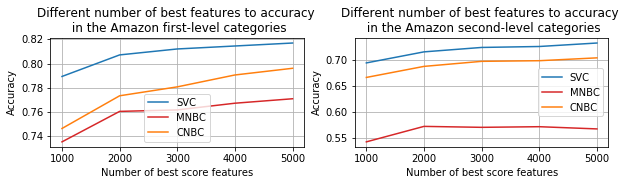

In [13]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[0],1)
gram_1MNBC = max(scoresMNBC)
gram_1CNBC = max(scoresCNBC)
gram_1SVC =  max(scoresSVC)
MNBCGram.append(gram_1MNBC)
CNBCGram.append(gram_1CNBC)
SVCGram.append(gram_1SVC)

In [14]:
num = 0
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(2)

----- OPEN Amazon data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 11595 ----- 



In [15]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
Best Feature Selection Size:9000

Best Accuracy:0.7599510104102878



In [16]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
Best Feature Selection Sizein second level:11000

Best Accuracy in second level:0.5480710349050827



In [17]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
Best Feature Selection Size:8000

Best Accuracy:0.8028169014084507



In [18]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
Best Feature Selection Sizein second level:10000

Best Accuracy in second level:0.7176974892835273



In [19]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
Best Feature Selection Size:10000

Best Accuracy:0.8205756276791182



In [20]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
Best Feature Selection Sizein second level:6000

Best Accuracy in second level:0.7391304347826086



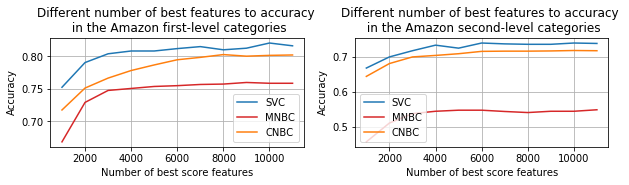

In [21]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[0],2)
gram_2MNBC = max(scoresMNBC)
gram_2CNBC = max(scoresCNBC)
gram_2SVC =  max(scoresSVC)
MNBCGram.append(gram_2MNBC)
CNBCGram.append(gram_2CNBC)
SVCGram.append(gram_2SVC)

In [22]:
num = 0
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(3)

----- OPEN Amazon data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 15409 ----- 



In [23]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
Best Feature Selection Size:14000


In [24]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
Best Feature Selection Sizein seco

In [25]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
Best Feature Select

In [26]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
Best Feature Select

In [27]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
Best Feature Selection Size:15000


In [28]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
Best Feature Selection Sizein seco

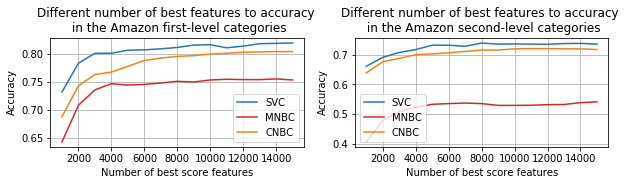

In [29]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[0],3)
gram_3MNBC = max(scoresMNBC)
gram_3CNBC = max(scoresCNBC)
gram_3SVC =  max(scoresSVC)
MNBCGram.append(gram_3MNBC)
CNBCGram.append(gram_3CNBC)
SVCGram.append(gram_3SVC)

In [30]:
SVCGram

[0.8169014084507042, 0.8205756276791182, 0.8193508879363135]

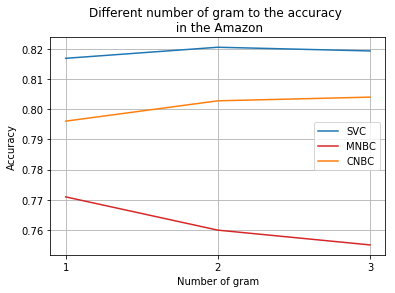

In [31]:
plotDifferentGramInfluence(Gram,MNBCGram,CNBCGram,SVCGram,folder[0])

In [32]:
MNBCGram = []
CNBCGram = []
SVCGram = []
Gram = range(1,4)

In [33]:
num = 1
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(1)

----- OPEN FlipKart data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 4742 ----- 



In [34]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
Best Feature Selection Size:2000

Best Accuracy:0.9448030987734022



In [35]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
Best Feature Selection Sizein second level:2000

Best Accuracy in second level:0.8641058747579083



In [36]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
Best Feature Selection Size:4000

Best Accuracy:0.9706262104583603



In [37]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
Best Feature Selection Sizein second level:4000

Best Accuracy in second level:0.9286636539703034



In [38]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
Best Feature Selection Size:4000

Best Accuracy:0.9903163331181407



In [39]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
Best Feature Selection Sizein second level:4000

Best Accuracy in second level:0.9796642995480955



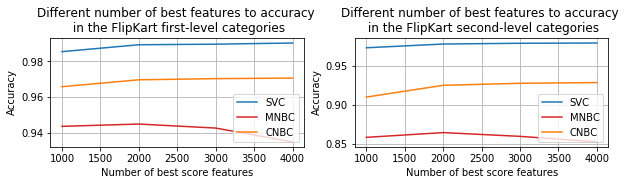

In [40]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[1],1)
gram_1MNBC = max(scoresMNBC)
gram_1CNBC = max(scoresCNBC)
gram_1SVC =  max(scoresSVC)
MNBCGram.append(gram_1MNBC)
CNBCGram.append(gram_1CNBC)
SVCGram.append(gram_1SVC)

In [41]:
num = 1
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(2)

----- OPEN FlipKart data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 18545 ----- 



In [42]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [43]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [44]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [45]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [46]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

In [47]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

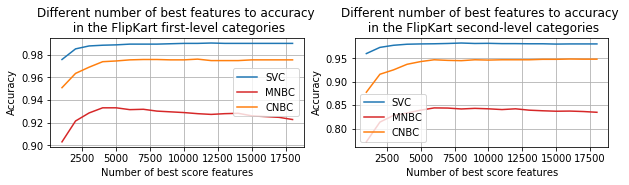

In [48]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[1],2)
gram_2MNBC = max(scoresMNBC)
gram_2CNBC = max(scoresCNBC)
gram_2SVC =  max(scoresSVC)
MNBCGram.append(gram_2MNBC)
CNBCGram.append(gram_2CNBC)
SVCGram.append(gram_2SVC)

In [49]:
num = 1
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(3)

----- OPEN FlipKart data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 33489 ----- 



In [50]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [51]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [52]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [53]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [54]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

In [55]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

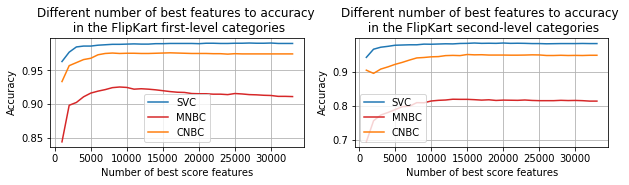

In [56]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[1],3)
gram_3MNBC = max(scoresMNBC)
gram_3CNBC = max(scoresCNBC)
gram_3SVC =  max(scoresSVC)
MNBCGram.append(gram_3MNBC)
CNBCGram.append(gram_3CNBC)
SVCGram.append(gram_3SVC)

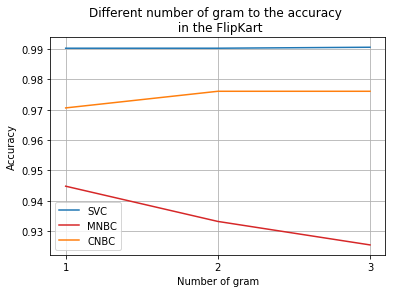

In [57]:
plotDifferentGramInfluence(Gram,MNBCGram,CNBCGram,SVCGram,folder[1])

In [58]:
MNBCGram = []
CNBCGram = []
SVCGram = []
Gram = range(1,4)

In [59]:
num = 2
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(1)

----- OPEN Combine data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 9545 ----- 



In [60]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
Best Feature Selection Size:3000

Best Accuracy:0.9328541374474053



In [61]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
Best Feature Selection Sizein second level:4000

Best Accuracy in second level:0.857468443197756



In [62]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
Best Feature Selection Size:5000

Best Accuracy:0.9444249649368864



In [63]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
Best Feature Selection Sizein second level:6000

Best Accuracy in second level:0.8942847124824684



In [64]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
Best Feature Selection Size:7000

Best Accuracy:0.9782608695652174



In [65]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
Best Feature Selection Sizein second level:6000

Best Accuracy in second level:0.9381136044880786



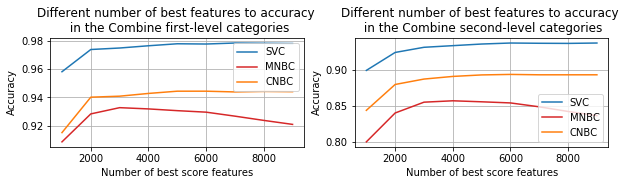

In [66]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[2],1)
gram_1MNBC = max(scoresMNBC)
gram_1CNBC = max(scoresCNBC)
gram_1SVC =  max(scoresSVC)
MNBCGram.append(gram_1MNBC)
CNBCGram.append(gram_1CNBC)
SVCGram.append(gram_1SVC)

In [67]:
num = 2
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(2)

----- OPEN Combine data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 31508 ----- 



In [68]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [69]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [70]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [71]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [72]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

In [73]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

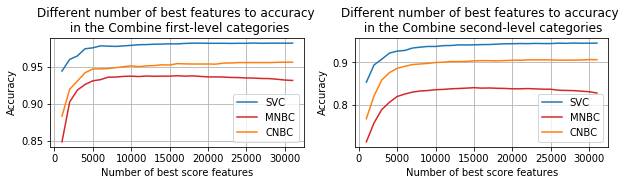

In [74]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[2],2)
gram_2MNBC = max(scoresMNBC)
gram_2CNBC = max(scoresCNBC)
gram_2SVC =  max(scoresSVC)
MNBCGram.append(gram_2MNBC)
CNBCGram.append(gram_2CNBC)
SVCGram.append(gram_2SVC)

In [75]:
num = 2
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(3)

----- OPEN Combine data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 52195 ----- 



In [76]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [77]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [78]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [79]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [80]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

In [81]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----
----- Select Best 2000 features ----- 

----- SVC fitting -----
----- Select Best 3000 features ----- 

----- SVC fitting -----
----- Select Best 4000 features ----- 

----- SVC fitting -----
----- Select Best 5000 features ----- 

----- SVC fitting -----
----- Select Best 6000 features ----- 

----- SVC fitting -----
----- Select Best 7000 features ----- 

----- SVC fitting -----
----- Select Best 8000 features ----- 

----- SVC fitting -----
----- Select Best 9000 features ----- 

----- SVC fitting -----
----- Select Best 10000 features ----- 

----- SVC fitting -----
----- Select Best 11000 features ----- 

----- SVC fitting -----
----- Select Best 12000 features ----- 

----- SVC fitting -----
----- Select Best 13000 features ----- 

----- SVC fitting -----
----- Select Best 14000 features ----- 

----- SVC fitting -----
----- Select Best 15000 features ----- 

----- SVC fitting -----
----- Select Best 16000 features -

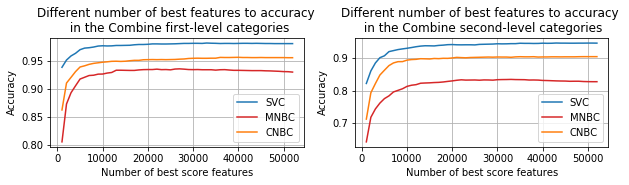

In [82]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[2],3)
gram_3MNBC = max(scoresMNBC)
gram_3CNBC = max(scoresCNBC)
gram_3SVC =  max(scoresSVC)
MNBCGram.append(gram_3MNBC)
CNBCGram.append(gram_3CNBC)
SVCGram.append(gram_3SVC)

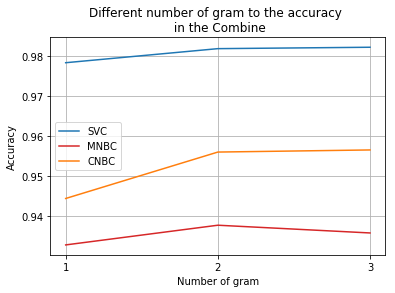

In [83]:
plotDifferentGramInfluence(Gram,MNBCGram,CNBCGram,SVCGram,folder[2])

In [84]:
MNBCGram = []
CNBCGram = []
SVCGram = []
Gram = range(1,4)

In [85]:
num = 3
fs = FeatureSelection(num)
fs.openFile()
fs.tfidfConvert(1)

----- OPEN Walmart data ----- 

----- Convert train data and test data to vector ----- 

----- Total # features: 26364 ----- 



In [86]:
numofBestMNBC,scoresMNBC = fs.MNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [87]:
numofBestndMNBC,scoresndMNBC = fs.ndLevelMNBC()

----- Select Best 1000 features ----- 

----- MNB fitting -----
----- Select Best 2000 features ----- 

----- MNB fitting -----
----- Select Best 3000 features ----- 

----- MNB fitting -----
----- Select Best 4000 features ----- 

----- MNB fitting -----
----- Select Best 5000 features ----- 

----- MNB fitting -----
----- Select Best 6000 features ----- 

----- MNB fitting -----
----- Select Best 7000 features ----- 

----- MNB fitting -----
----- Select Best 8000 features ----- 

----- MNB fitting -----
----- Select Best 9000 features ----- 

----- MNB fitting -----
----- Select Best 10000 features ----- 

----- MNB fitting -----
----- Select Best 11000 features ----- 

----- MNB fitting -----
----- Select Best 12000 features ----- 

----- MNB fitting -----
----- Select Best 13000 features ----- 

----- MNB fitting -----
----- Select Best 14000 features ----- 

----- MNB fitting -----
----- Select Best 15000 features ----- 

----- MNB fitting -----
----- Select Best 16000 features -

In [88]:
numofBestCNBC,scoresCNBC = fs.CNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [89]:
numofBestndCNBC,scoresndCNBC = fs.ndLevelCNBC()

----- Select Best 1000 features ----- 

----- CNBC fitting -----
----- Select Best 2000 features ----- 

----- CNBC fitting -----
----- Select Best 3000 features ----- 

----- CNBC fitting -----
----- Select Best 4000 features ----- 

----- CNBC fitting -----
----- Select Best 5000 features ----- 

----- CNBC fitting -----
----- Select Best 6000 features ----- 

----- CNBC fitting -----
----- Select Best 7000 features ----- 

----- CNBC fitting -----
----- Select Best 8000 features ----- 

----- CNBC fitting -----
----- Select Best 9000 features ----- 

----- CNBC fitting -----
----- Select Best 10000 features ----- 

----- CNBC fitting -----
----- Select Best 11000 features ----- 

----- CNBC fitting -----
----- Select Best 12000 features ----- 

----- CNBC fitting -----
----- Select Best 13000 features ----- 

----- CNBC fitting -----
----- Select Best 14000 features ----- 

----- CNBC fitting -----
----- Select Best 15000 features ----- 

----- CNBC fitting -----
----- Select Best 1

In [90]:
numofBestSVC,scoresSVC = fs.SVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 2000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 3000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 4000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 5000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 6000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 7000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 8000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 9000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 10000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 11000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 12000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 13000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 14000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 15000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 16000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 17000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 18000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 19000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 20000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 21000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 22000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 23000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 24000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 25000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 26000 features ----- 

----- SVC fitting -----
Best Feature Selection Size:22000

Best Accuracy:0.8647043539586504



/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [91]:
numofBestndSVC,scoresndSVC = fs.ndLevelSVC()

----- Select Best 1000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 2000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 3000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 4000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 5000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 6000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 7000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 8000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 9000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 10000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 11000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 12000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 13000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 14000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 15000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 16000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 17000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 18000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 19000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 20000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 21000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 22000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 23000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 24000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 25000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


----- Select Best 26000 features ----- 

----- SVC fitting -----


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Feature Selection Sizein second level:26000

Best Accuracy in second level:0.6698712000296945



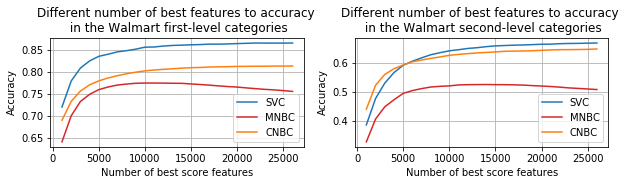

In [92]:
plotDifferentNumFeatureInfluence(numofBestMNBC,numofBestndSVC,scoresSVC,scoresndSVC,scoresMNBC,scoresndMNBC,scoresCNBC,scoresndCNBC,folder[3],1)
gram_1MNBC = max(scoresMNBC)
gram_1CNBC = max(scoresCNBC)
gram_1SVC =  max(scoresSVC)
MNBCGram.append(gram_1MNBC)
CNBCGram.append(gram_1CNBC)
SVCGram.append(gram_1SVC)